1. 机器学习评价指标

1.1 分类任务

1.1.1 准确率 (Accuracy)

In [6]:
from sklearn.metrics import accuracy_score

y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 0, 1, 1]
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy (使用库的结果):", accuracy)


Accuracy (使用库的结果): 0.6


In [7]:
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

print("Accuracy (不使用库的结果):", accuracy(y_true, y_pred))



Accuracy (不使用库的结果): 0.6


1.1.2 精确率 (Precision)

In [8]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
print("Precision (using library):", precision)


Precision (using library): 0.6666666666666666


In [9]:
def precision(y_true, y_pred):
    TP = 0
    FP = 0
    
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
            
    if (TP + FP) > 0:
        return TP / (TP + FP)
    else:
        return 0

print("Precision (without library):", precision(y_true, y_pred))


Precision (without library): 0.6666666666666666


1.1.3 召回率 (Recall)

In [10]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
print("Recall (using library):", recall)


Recall (using library): 0.6666666666666666


In [11]:
def recall(y_true, y_pred):
    TP = 0
    FN = 0
    
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN += 1
            
    if (TP + FN) > 0:
        return TP / (TP + FN)
    else:
        return 0

print("Recall (without library):", recall(y_true, y_pred))


Recall (without library): 0.6666666666666666


1.1.4 F1-score

In [12]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print("F1 Score (using library):", f1)


F1 Score (using library): 0.6666666666666666


In [13]:
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    
    if (prec + rec) > 0:
        return 2 * (prec * rec) / (prec + rec)
    else:
        return 0

print("F1 Score (without library):", f1_score(y_true, y_pred))


F1 Score (without library): 0.6666666666666666


In [ ]:
1.1.5 ROC和AUC
ROC（Receiver Operating Characteristic）曲线和相关的指标主要用于二分类问题。
以下是一些相关的概念和指标：
原理： ROC曲线是通过绘制真正率（True Positive Rate, TPR）与假正率（False Positive Rate, FPR）之间的关系来评估分类模型性能的图形。
TPR表示正确预测的正样本比例，FPR表示错误预测为正的负样本比例。
2. AUC（Area Under the Curve）
原理： AUC是ROC曲线下面积的值，表示模型的区分能力。AUC的值在0到1之间，值越接近1表示模型的性能越好，0.5表示随机猜测。

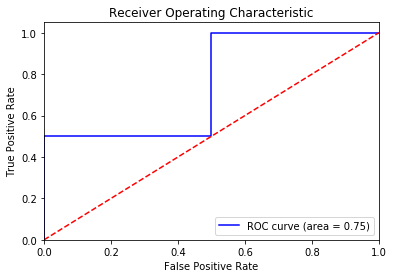

roc_auc 0.75


In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]  # 模型的预测分数

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 随机猜测的参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("roc_auc",roc_auc)

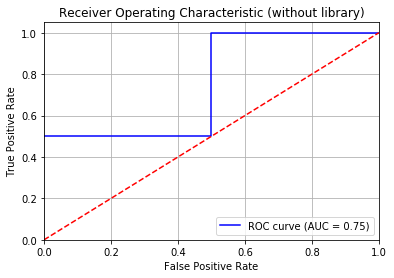

AUC (without library): 0.75


In [24]:
def calculate_roc(y_true, y_scores):
    # 创建阈值列表
    thresholds = sorted(set(y_scores), reverse=True)
    tpr_list = []  # 保存TPR值
    fpr_list = []  # 保存FPR值

    # 对每个阈值计算TPR和FPR
    for threshold in thresholds:
        tp = fp = tn = fn = 0  # 初始化计数器
        for i in range(len(y_true)):
            if y_scores[i] >= threshold:  # 预测为正类
                if y_true[i] == 1:
                    tp += 1  # 真阳性
                else:
                    fp += 1  # 假阳性
            else:  # 预测为负类
                if y_true[i] == 1:
                    fn += 1  # 假阴性
                else:
                    tn += 1  # 真阴性
        
        # 计算TPR和FPR
        if (tp + fn) > 0:
            tpr = tp / (tp + fn)  # 真正率
        else:
            tpr = 0
        
        if (fp + tn) > 0:
            fpr = fp / (fp + tn)  # 假正率
        else:
            fpr = 0

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return fpr_list, tpr_list, thresholds

# 计算ROC
fpr, tpr, thresholds = calculate_roc(y_true, y_scores)

# 计算AUC（使用梯形法）
def calculate_auc(fpr, tpr):
    auc = 0
    for i in range(1, len(fpr)):
        # 使用梯形法计算AUC
        width = fpr[i] - fpr[i - 1]
        height = (tpr[i] + tpr[i - 1]) / 2
        auc += width * height  # 累加面积
    return auc

roc_auc = calculate_auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 随机猜测的基线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (without library)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("AUC (without library):", roc_auc)


1.2 回归任务
1.2.1 均方误差 (MSE)

In [ ]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
print("MSE (using library):", mse)


MSE (using library): 0.375


In [19]:
def mean_squared_error(y_true, y_pred):
    total_error = 0
    for i in range(len(y_true)):
        error = y_true[i] - y_pred[i]  # 计算每个预测值的误差
        total_error += error ** 2  # 累加误差的平方
    return total_error / len(y_true)  # 返回均方误差

print("MSE (without library):", mean_squared_error(y_true, y_pred))


MSE (without library): 0.375


1.2.2 根均方误差 (RMSE)
原理： 根均方误差 (RMSE) 是均方误差的平方根，反映与原始数据单位相同的误差程度。

In [20]:
import numpy as np

rmse = np.sqrt(mse)
print("RMSE (using library):", rmse)


RMSE (using library): 0.6123724356957945


In [21]:
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)  # 先计算MSE
    return mse ** 0.5  # 返回RMSE

print("RMSE (without library):", root_mean_squared_error(y_true, y_pred))


RMSE (without library): 0.6123724356957945


1.2.3 R² (决定系数)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print("R² (using library):", r2)


In [15]:
def r2_score(y_true, y_pred):
    # 计算真实值的均值
    total = 0
    for value in y_true:
        total += value
    mean_true = total / len(y_true)  # 真实值的均值

    # 计算总方差
    total_variance = 0
    for value in y_true:
        # 对每个真实值，计算与均值的差的平方，并累加
        deviation = value - mean_true  # 真实值与均值的差
        total_variance += deviation ** 2  # 累加平方

    # 计算残差方差
    residual_variance = 0
    for i in range(len(y_true)):
        # 对每个真实值与预测值，计算其差的平方，并累加
        error = y_true[i] - y_pred[i]  # 真实值与预测值的差
        residual_variance += error ** 2  # 累加平方

    # 计算R²值
    if total_variance > 0:  # 防止除以0
        r2 = 1 - (residual_variance / total_variance)  # 返回R²值
    else:
        r2 = 0  # 如果总方差为0，返回0

    return r2

# 示例

print("R² (without library):", r2_score(y_true, y_pred))



R² (without library): 0.9486081370449679
